<a href="https://colab.research.google.com/github/mohd-faizy/CAREER-TRACK-Data-Scientist-with-Python/blob/main/03_hacker_statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- 
<strong> 
    <h1 align='center'>HACKER STATISTICS</h1> 
</strong>

---

<p align='center'>
    <a href='#'><img src='https://cdn.wallpapersafari.com/29/56/ymaAeU.jpg' height= 600, width= 900>
    </a>
<p>

## __Probabilistic logic and statistical inference__

__What is the goal of statistical inference?__Why do we do statistical inference?

>**Statistical inference** involves taking your data to **probabilistic conclusions** about what you would expect if we took even more data, and we can make **decisions** based on these conclusions.

- To draw **probabilistic conclusions** about what we might expect if we collected the same data again.

- To draw **actionable conclusions from data**.

- To **draw more general conclusions** from **relatively few data or observations**.




__Why do we use the language of probability?__

- Probability provides a measure of uncertainty.

- It can be used to estimate the likelihood of an outcome.

- Data are almost never exactly the same when acquired again, and probability allows us to say how much we expect them to vary.



__Hacker statistics__

Uses simulated repeated measurements to compute probabilities.

`np.random module`: Suite of functions based on random number generation.

__Random number seed:__
- Integer fed into random number generating algorithm.
- Manually seed random number generator if we need reproducibility.
- Specified using `np.random.seed()`

__Bernoulli trial:__  A __Bernoulli trial__ (or binomial trial) is a __random experiment__ with exactly __two possible outcomes__, __"success"__ and __"failure"__, in which the __probability of success__ is the __same__ every time the experiment is conducted.





### ***Simulating*** 4 coin flips

In [1]:
import numpy as np
np.random.seed(42)
random_numbers = np.random.random(size=4)
random_numbers

array([0.37454012, 0.95071431, 0.73199394, 0.59865848])

In [2]:
heads = random_numbers < 0.5
heads

array([ True, False, False, False])

In [3]:
np.sum(heads)

1

In [4]:
# Using for loop
n_all_heads = 0 # Initialize number of 4-heads trials

for _ in range(10000):
    heads = np.random.random(size=4) < 0.5
    n_heads = np.sum(heads)
    if n_heads == 4:   # if the given trials has 4 heads we increse the count
        n_all_heads += 1
'''
So, what is the probability of getting all four heads? It's the number of times
we got all heads, divided by the total number of trials we did. 
'''
n_all_heads / 10000 

0.0619

__Hacker stats probabilities__

- Determine how to simulate data.
- Simulate many many times.
- Probability is approximately fraction of trials with the outcome of interest.

## **Generating random numbers using the `np.random` module**

`np.random.random()` for a test spin. The function returns a random number between **zero** and **one**. 

Call `np.random.random()` a few times in the IPython shell. You should see numbers jumping around between **zero** and **one**.

In this exercise, we'll generate lots of **random numbers** between **zero** and **one**, and then plot a histogram of the results. If the numbers are truly random, all bars in the histogram should be of (close to) equal height.



__Instructions__

- Seed the random number generator using the seed 42.
- Initialize an empty array, `random_numbers`, of 100,000 entries to store the random numbers. Make sure you use `np.empty(100000)` to do this.

- Write a `for` loop to draw 100,000 random numbers using `np.random.random()`, storing them in the random_numbers array. To do so, loop over `range(100000)`.

- Plot a histogram of `random_numbers`.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Seed the random number generator
np.random.seed(42)

# Initialize random numbers: random_numbers
random_numbers = np.empty(100000)

# Generate random numbers by looping over range(100000)
for i in range(100000):
    random_numbers[i] = np.random.random()
    print(random_numbers[i])

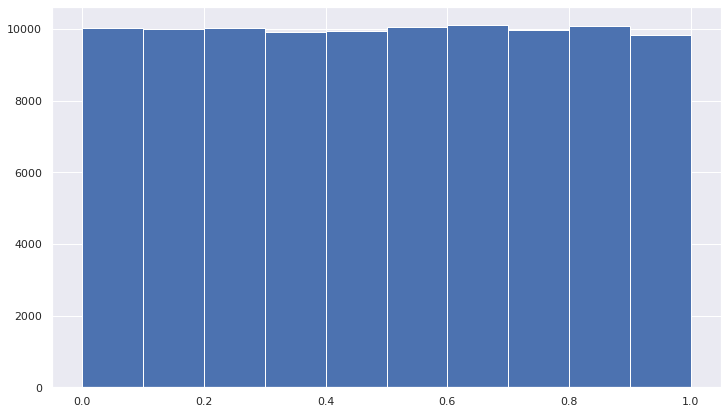

In [6]:
# Set default Seaborn style
sns.set()

# figure size
plt.figure(figsize=(12, 7))

# Plot a histogram
_ = plt.hist(random_numbers)

# Show the plot
plt.show()

The **histogram** is **almost exactly flat across the top**, indicating that there is **equal chance that a randomly-generated number** is in any of the **bins** of the **histogram**.

### ***The `np.random` module and Bernoulli trials***


we can think of a **Bernoulli trial** as a flip of a possibly biased coin. Specifically, each coin flip has a probability $p$ of landing heads (success) and probability $(1-p)$ of landing tails (failure).

In this exercise, you will write a function to perform $n$ Bernoulli trials, `perform_bernoulli_trials(n, p)`, which returns the number of successes out of $n$ Bernoulli trials, each of which has probability $p$ of success. To perform each Bernoulli trial, use the `np.random.random()` function, which returns a random number between $0$ and $1$.

__Instructions__

- Define a function with signature `perform_bernoulli_trials(n, p)`.

    - Initialize to `zero` a variable `n_success` the counter of `Trues`, which are Bernoulli trial successes.

    - Write a `for` loop where you perform a Bernoulli trial in each iteration and increment the number of success if the result is `True`.

        - Perform n iterations by looping over `range(n)`. To perform a Bernoulli trial, choose a random number between zero and one using `np.random.random()`. If the number you chose is less than p, increment `n_success` (use the `+= 1` operator to achieve this).

    - The function returns the number of successes `n_success`.

In [7]:
import numpy as np

def perform_bernoulli_trials(n, p):
    """Perform n Bernoulli trials with success probability p
    and return number of successes."""
    # Initialize number of successes: n_success
    n_success = 0

    # Perform trials
    for i in range(n):
        # Choose random number between zero and one: random_number
        random_number = np.random.random()

        # If less than p, it's a success so add one to n_success
        if random_number < p:
            n_success += 1

    return n_success

print(perform_bernoulli_trials(10000, 0.01))
print(perform_bernoulli_trials(10000, 0.65))
print(perform_bernoulli_trials(10000, 0.77))
print(perform_bernoulli_trials(10000, 0.99))


105
6430
7783
9884


### __Banking Problem: How many defaults might we expect?__

Let's say a bank made 100 mortgage loans. It is possible that anywhere between 0 and 100 of the loans will be defaulted upon. $

__Task__ is to know the **probability** of getting a **given number of defaults**, given that the **probability** of a default is __p=0.05__. 

To investigate this, we you will do a simulation. **we will perform 100 Bernoulli trials using the `perform_bernoulli_trials()`** function we wrote above and record how many defaults we get. 

Here, a __success__ is a __default__. (Remember that the word "success" just means that the __Bernoulli trial evaluates to True__, i.e., __did the loan recipient default?__) You will do this for another 100 Bernoulli trials. And again and again until we have tried it 1000 times. Then, you will plot a histogram describing the probability of the number of defaults.

__Instruction__

- Seed the random number generator to 42.

- Initialize `n_defaults`, an **empty array**, using `np.empty()``. It should contain **1000 entries**, ***since we are doing 1000 simulations***.

- Write a `for` loop with `1000 `iterations to compute the number of defaults per 100 loans using the `perform_bernoulli_trials()` function. 
    - It accepts ***two*** arguments:   
    
        - the number of trials __n__  in this case 100 
        - and the **probability of success** __p__ 
    - In this case the probability of a __default__, which is __0.05__. On each iteration of the loop store the result in an entry of `n_defaults`.

- Plot a histogram of `n_defaults`. Include the `density=True` keyword argument so that the height of the bars of the histogram indicate the probability.

- Show your plot.

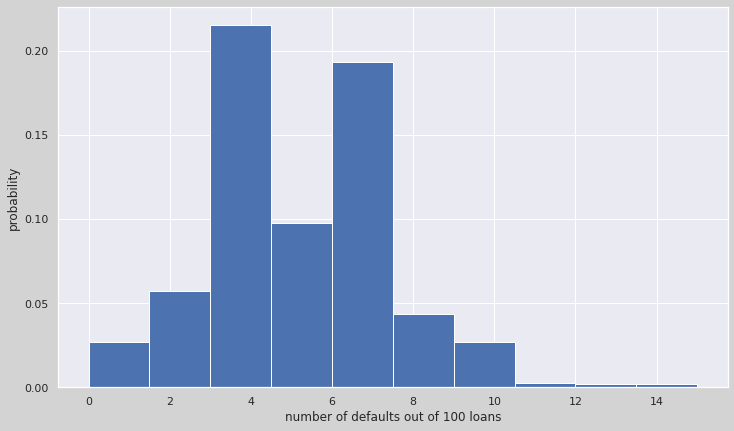

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def perform_bernoulli_trials(n, p):
    """Perform n Bernoulli trials with success probability p
    and return number of successes."""
    # Initialize number of successes: n_success
    n_success = 0

    # Perform trials
    for i in range(n):
        # Choose random number between zero and one: random_number
        random_number = np.random.random()

        # If less than p, it's a success so add one to n_success
        if random_number < p:
            n_success += 1

    return n_success


# Seed random number generator
np.random.seed(42)

# Initialize the number of defaults: n_defaults
n_defaults = np.empty(1000)

# Compute the number of defaults
for i in range(1000):
    n_defaults[i] = perform_bernoulli_trials(100, 0.05)

# figure size
plt.figure(figsize=(12, 7), facecolor='lightgrey')

# Set default Seaborn style
sns.set()

# Plot the histogram with default number of bins; label your axes
_ = plt.hist(n_defaults, density=True)
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('probability')

# Show the plot
plt.show()

This is actually **not an optimal way** to plot a histogram when the results are known to be **integers**. We will revisit this in forthcoming exercises

### __Will the bank fail?__

**Plot the number of defaults you got from the previous exercise**, in your namespace as `n_defaults`, as a **CDF**.

The `ecdf()` function is available.

***If interest rates are such that the bank will lose money if 10 or more of its loans are defaulted upon, what is the probability that the bank will lose money?***

__Instruction__

- Compute the `x` and `y` values for the `ECDF` of `n_defaults`.

- Plot the `ECDF, making sure to label the axes. Remember to include `marker = '.'` and `linestyle = 'none'` in addition to `x` and `y` in your call `plt.plot()`.

- Show the plot.

- Compute the total number of entries in your `n_defaults` array that were greater than or equal to `10`. To do so, **compute a boolean array** that tells you **whether a given entry of `n_defaults` is `>= 10`**. Then sum all the entries in this array using `np.sum()`. For example, `np.sum(n_defaults <= 5)` would compute the number of defaults with 5 or fewer defaults.

- The probability that the bank loses money is the fraction of `n_defaults` that are greater than or equal to 10. Print this result by hitting 'Submit Answer'!


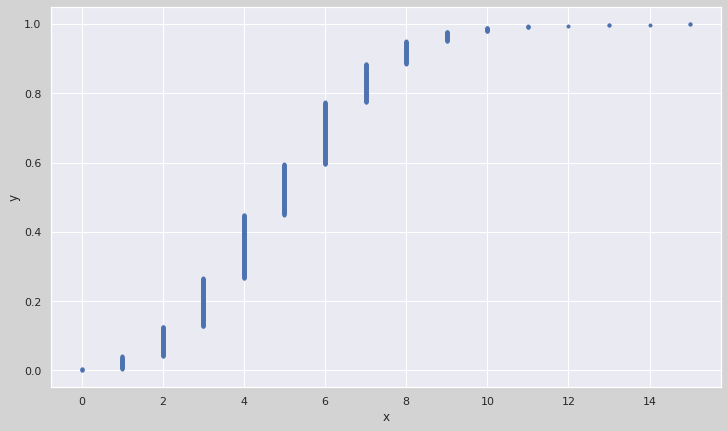

Probability of losing money = 0.022


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n + 1) / n

    return x, y


# Seed random number generator
np.random.seed(42)

# Initialize the number of defaults: n_defaults
n_defaults = np.empty(1000)

# Compute the number of defaults
for i in range(1000):
    n_defaults[i] = perform_bernoulli_trials(100, 0.05)

# Compute ECDF: x, y
x, y = ecdf(n_defaults)

# figure size
plt.figure(figsize=(12, 7), facecolor='lightgrey')

# Set default Seaborn style
sns.set()

# Plot the ECDF with labeled axes
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('x')
_ = plt.ylabel('y')

# Show the plot
plt.show()

# Compute the number of 100-loan simulations with 10 or more defaults: n_lose_money
n_lose_money = np.sum(n_defaults >= 10)

# Compute and print probability of losing money
print('Probability of losing money =', n_lose_money / len(n_defaults))

__ECDF Graph Interpreation__

As we might expect, we most likely get `5/100` defaults. But we still have about a `2%` chance of getting `10` or more defaults out of `100` loans

## __Pobability distributions and stories: The Binomial distribution__

<strong><h3>Probability mass function (PMF)</h3></strong>

A PMF is defined as the set of probabilities of discrete outcomes. 

To understand how this works, consider a person **rolling a die** once. The outcomes are discrete because only certain values may be attained; we cannot roll a __3.7__ with a die. 

Each result has the same, or uniform probability, __1/6__. For this reason, the PMF associated with this story is called the **Discrete Uniform PMF**. Now the PMF is a property of a discrete probability distribution.

>A $distribution$ is just a __mathematical description__ of __outcomes__.

<strong><h3>Normal Distribution:</h3></strong>

The Normal Distribution is one of the most important distributions.

It is also called the **Gaussian Distribution** after the German mathematician **Carl Friedrich Gauss**.

It **fits the probability distribution** of **many events**, eg. IQ Scores, Heartbeat etc.

Use the `random.normal()` method to get a Normal Data Distribution.

***It has three parameters:***

- $loc$ - (Mean) where the peak of the bell exists.

- $scale$ - (Standard Deviation) how flat the graph distribution should be.

- $size$ - The shape of the returned array.

<strong><h3>Binomial distribution:</h3></strong>

Binomial Distribution is a Discrete Distribution.It describes the outcome of binary scenarios, e.g. toss of a coin, it will either be head or tails.

_It has three parameters:_

- $n$ - number of trials.
- $p$ - probability of occurence of each trial (e.g. for toss of a coin 0.5 each).
- $size$ - The shape of the returned array.

The number __r__ of successes in n Bernoulli trials with probability __p__ of success is Binomially distributed.

The number __r__ of heads in 4 coin flips matches this story, since a coin flip is a Bernoulli trial with __p = 0.5__.




In [10]:
np.random.binomial(4, 0.5)

2

In [11]:
np.random.binomial(4, 0.5, size=10)

array([2, 2, 2, 2, 2, 3, 3, 2, 2, 0])

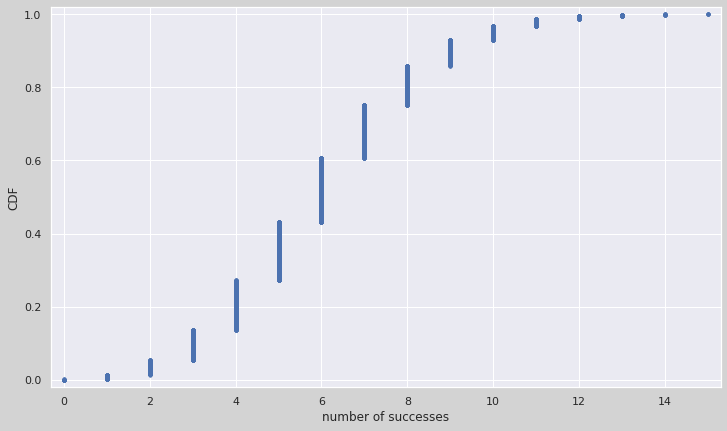

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ECDF function
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n + 1) / n

    return x, y

n = 60   # Number of trails
p = 0.1  # probability of occurence of each trial
samples = np.random.binomial(n, p, size=10000)

# figure size
plt.figure(figsize=(12, 7), facecolor='lightgrey')

# Set default Seaborn style
sns.set()


# Ploting ECDF
x, y = ecdf(samples)

_ = plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('number of successes')
_ = plt.ylabel('CDF')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


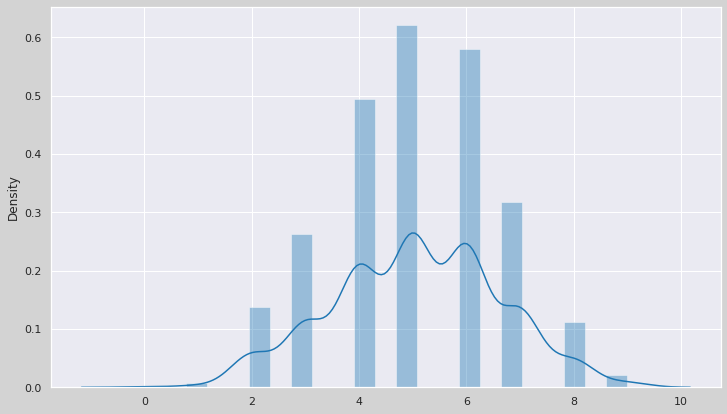

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sample = np.random.binomial(n=10, p=0.5, size=1000)

# figure size
plt.figure(figsize=(12, 7), facecolor='lightgrey')

# seaborn distribution Plot
sns.distplot(sample, hist=True, kde=True, color='tab:blue')

plt.show()

### Sampling out of the Binomial distribution

Compute the `Probability Mass Function(PMF)` for the number of defaults we would expect for 100 loans as in the last section, but instead of simulating all of the Bernoulli trials, perform the sampling using `np.random.binomial()`. This is identical to the calculation you did in the last set of exercises using your custom-written.

`perform_bernoulli_trials()` function, but far more **computationally efficient**. Given this extra efficiency, we will take 10,000 samples instead of 1000. After taking the samples, plot the CDF as last time. This **CDF** that you are plotting is that of the Binomial distribution.

Note: random number generator is pre-seeded for you (with np.random.seed(42)) to save you typing that each time.


__Instructions__

- Draw samples out of the Binomial distribution using `np.random.binomial()`. You should use parameters `n = 100` and `p = 0.05`, and set the `size` keyword argument to `10000`.

- Compute the CDF using your previously-written `ecdf()` function.

- Plot the CDF with axis labels. The x-axis here is the number of defaults out of 100 loans, while the y-axis is the CDF.

- Show the plot.




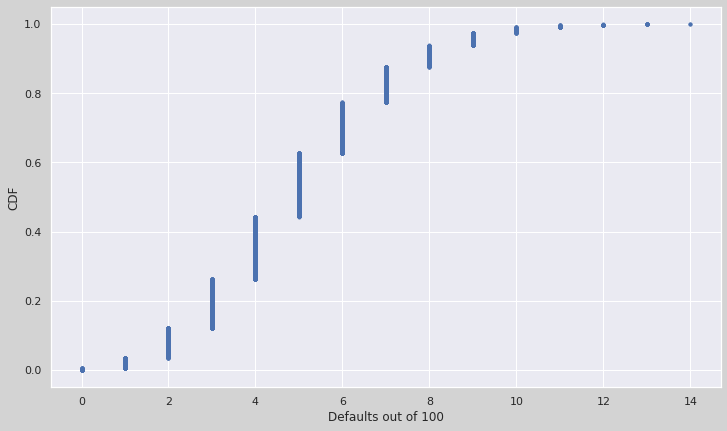

In [14]:
# Sampling out of the Binomial distribution
# importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Defining the ECDF
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n + 1) / n

    return x, y

# figure size
plt.figure(figsize=(12, 7), facecolor='lightgrey')

# Set default Seaborn style
sns.set()

# Seed random number generator
np.random.seed(42)

# Take 10,000 samples out of the binomial distribution: n_defaults
n_defaults = np.random.binomial(n=100, p=0.05, size=10000)

# Compute CDF: x, y

x, y = ecdf(n_defaults)

# Plot the CDF with axis labels
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('Defaults out of 100')
_ = plt.ylabel('CDF')

# Show the plot
plt.show()

$\color{red}{\textbf{Note:}}$ Using **built-in algorithms to directly sample out** of the distribution is **much faster**.

### __Difference Between Normal and Binomial Distribution__

The main difference is that **normal distribution** is **continous** whereas **binomial** is **discrete**, but if there are enough data points it will be quite similar to normal distribution with certain `loc` and `scale`.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


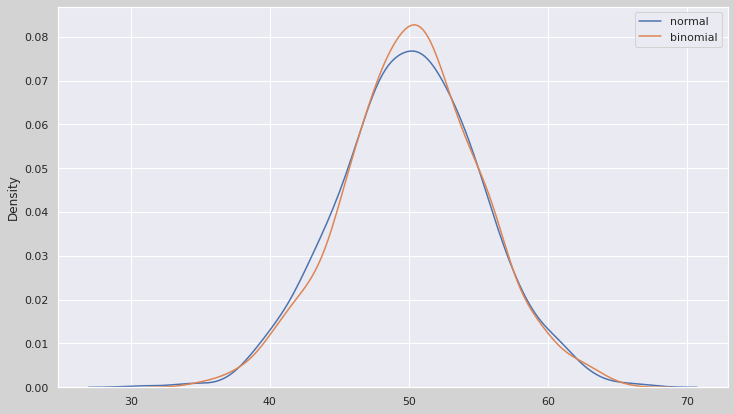

In [15]:
# Normal Distribution
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

nor_sample = np.random.normal(loc=50, scale=5, size=1000)
bin_sample=np.random.binomial(n=100, p=0.5, size=1000)

# figure size
plt.figure(figsize=(12, 7), facecolor='lightgrey')

sns.distplot(nor_sample, hist=False, kde=True, label='normal')
sns.distplot(bin_sample, hist=False, kde=True, label='binomial')
plt.legend()
plt.show()

### __Plotting the Binomial PMF__

Plotting a nice looking PMF requires a bit of matplotlib trickery that we will not go into here. Instead, we will plot the PMF of the Binomial distribution as a histogram with skills you have already learned. 

The trick is setting up the edges of the bins to pass to `plt.hist()` via the `bins` keyword argument. We want the bins centered on the integers. So, the edges of the bins should be `-0.5, 0.5, 1.5, 2.5, ... up to max(n_defaults) + 1.5`. You can generate an array like this using np.arange() and then subtracting 0.5 from the array.

we have already sampled out of the Binomial distribution during your exercises on loan defaults, and the resulting samples are in the NumPy array `n_defaults`.

__Instructions__

- Using `np.arange()`, compute the bin edges such that the `bins` are centered on the integers. Store the resulting array in the variable `bins`.

- Use `plt.hist()` to plot the histogram of n_defaults with the normed=True and `bins=bins` keyword arguments.

- Show the plot.

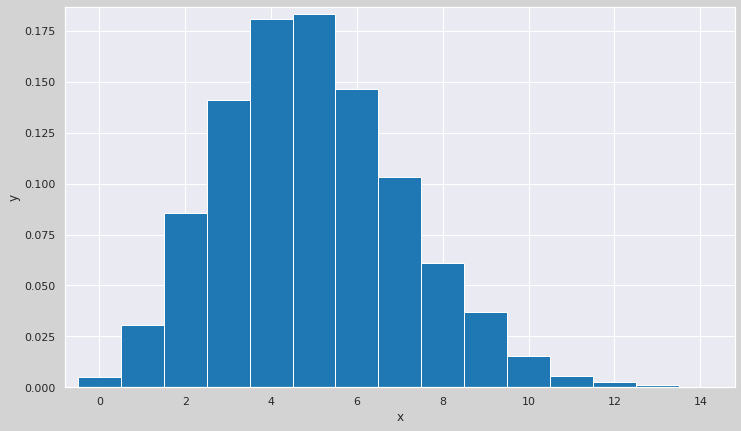

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n + 1) / n

    return x, y


# Seed random number generator
np.random.seed(42)

# Take 10,000 samples out of the binomial distribution: n_defaults
n_defaults = np.random.binomial(n=100, p=0.05, size=10000)

# Compute bin edges: bins
bins = np.arange(min(n_defaults), max(n_defaults) + 1.5) - 0.5

# figure size
plt.figure(figsize=(12, 7), facecolor='lightgrey')

# Set default Seaborn style
sns.set()

# Generate histogram
_ = plt.hist(n_defaults, density=True, bins=bins, color='tab:blue')

# Set margins
_ = plt.margins(0.02)

# Label axes
_ = plt.xlabel('x')
_ = plt.ylabel('y')

# Show the plot
plt.show()

## __Poisson processes and the Poisson distribution__

### __Poisson Distribution__



>Poisson Distribution is a Discrete Distribution. It estimates **how many times an event can happen in a specified time**. e.g. *If someone eats twice a day what is probability he will eat thrice?*

**This type of distribution is useful when you need to know:**
- *Which outcomes are most likely*
- *The spread of potential values, and*
- *The likelihood of different results.*

**It has two parameters:**

- `lam`(lambda) - rate or known number of occurences e.g. 2 for above problem.

- `size` - The shape of the returned array


<p align='center'>
  <a href="#">
    <img src='https://github.com/mohd-faizy/CAREER-TRACK-Data-Scientist-with-Python/blob/main/22_Statistical-Thinking-in-Python-%5BPart%20-1%5D/_png/Poisson%20Distribution.png?raw=true'>
  </a>
</p>

The **Poisson distribution** is used to describe the distribution of rare events in a large population. **For example**, at any particular time, ***there is a certain probability that a particular cell within a large population of cells will acquire a mutation***.

>Poisson distributions are often used to understand ***independent events that occur at a constant rate within a given interval of time***.

>Many economic and financial data appear as count variables, such as how many times a person becomes unemployed in a given year, thus lending itself to analysis with a Poisson distribution.
    
The Poisson distribution is also commonly used to model financial count data where the tally is small and is often zero. For one example, in finance, it can be used to model the number of trades that a typical investor will make in a given day, which can be 0 (often), or 1, or 2, etc.

As another example, this model can be used to predict the number of "shocks" to the market that will occur in a given time period, say over a decade.

$$ P\left( x \right) = \frac{{e^{ - \lambda } \lambda ^x }}{{x!}} $$

Where:

- `e` is Euler's number `(e = 2.71828...)`
- `x` is the number of occurrences
- `x!` is the factorial of `x
- `λ` is equal to the expected value of `x` when that is also equal to its variance


In [17]:
import numpy as np

x = np.random.poisson(lam=2, size=10)
print(x)

[1 1 2 6 1 0 1 1 0 1]


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


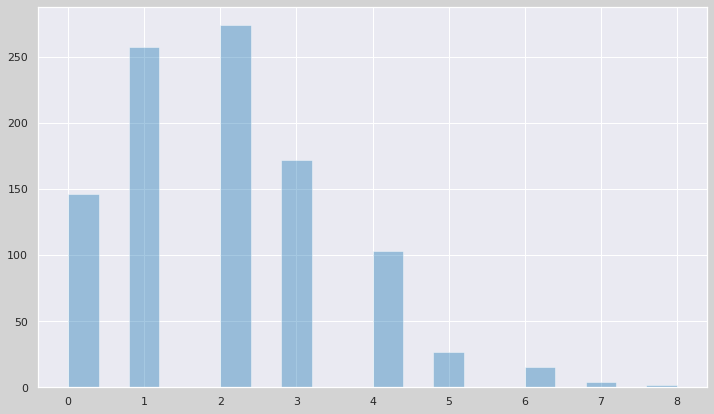

In [18]:
# Visualization of Poisson Distribution
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# figure size
plt.figure(figsize=(12, 7), facecolor='lightgrey')

sns.distplot(np.random.poisson(lam=2, size=1000), hist=True,
             kde=False, color='tab:blue')

plt.show()

### __Difference Between Normal and Poisson Distribution__

Normal distribution is **continous** whereas poisson is **discrete**.

But we can see that similar to binomial ***for a large enough poisson distribution*** it will become **similar** to normal distribution with certain **std dev** and **mean**.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


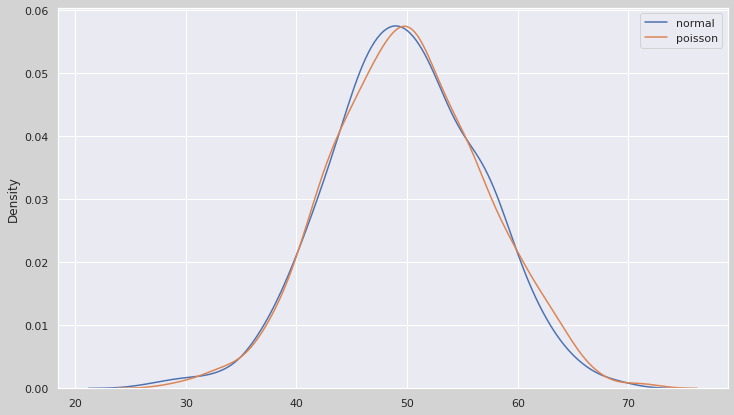

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# figure size
plt.figure(figsize=(12, 7), facecolor='lightgrey')

sns.distplot(np.random.normal(loc=50, scale=7, size=1000), hist=False, kde=True, label='normal')
sns.distplot(np.random.poisson(lam=50, size=1000), hist=False, kde=True, label='poisson')
plt.legend()
plt.show()

### __Difference Between Poisson and Binomial Distribution__

For very large `n` and near-zero `p` binomial distribution is near identical to poisson distribution such that `n * p` is nearly equal to `lam`.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


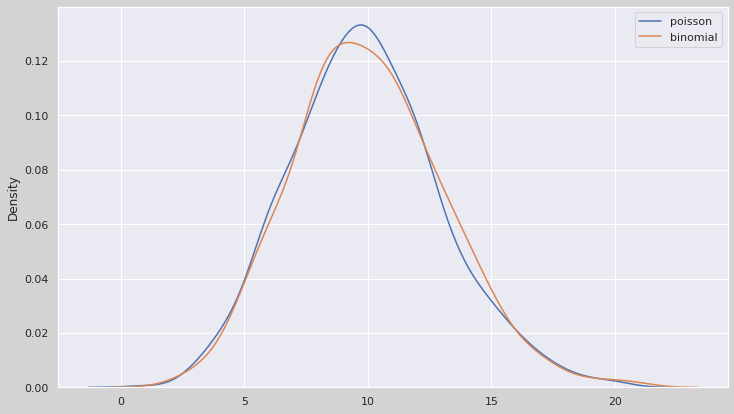

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# figure size
plt.figure(figsize=(12, 7), facecolor='lightgrey')
sns.distplot(np.random.poisson(lam=10, size=1000), hist=False, kde=True, label='poisson')
sns.distplot(np.random.binomial(n=1000, p=0.01, size=1000), hist=False, kde=True, label='binomial')
plt.legend()
plt.show()

### __Relationship between Binomial and Poisson distributions__

The **Poisson distribution** is a limit of the **Binomial distribution** for **rare events**.

This makes sense if you think about the stories. Say! we do a **Bernoulli trial** every minute for an hour, each with a ***success probability*** of `0.1`. We would do `60` trials, and **the number of successes** is **Binomially distributed**, and we would expect to get about `6` successes.

This is just like the Poisson story, where we get on average __6 hits__ on a website per hour. So, the __Poisson distribution__ with arrival rate equal to $np$ approximates a __Binomial distribution__ for $n$ __Bernoulli trials__ with probability $p$ of success (with $n$ large  and $p$ small).

__Importantly__, the __Poisson distribution__ is often simpler to work with because it has __only one parameter__ instead of __two__ for the __Binomial distribution__.

Let's explore these two distributions computationally. we will compute the __mean__ and __standard deviation__ of samples from a __Poisson distribution__ with an arrival rate of __10__. Then, we will compute the __mean__ and __standard deviation__ of samples from a __Binomial distribution__ with parameters $n$ and $p$  such that $np=10$. 

__Instructions:__

- Using the `np.random.poisson()` function, draw `10000` samples from a Poisson distribution with a mean of `10`.

- Make a list of the $n$ and $p$ values to consider for the Binomial distribution. Choose `n = [20, 100, 1000]` and `p = [0.5, 0.1, 0.01]` so that $np$ is always 10.

- Using `np.random.binomial()` inside the provided `for` loop, draw `10000` samples from a Binomial distribution with each `n, p` pair and print the mean and standard deviation of the samples. There are 3 `n, p` pairs: `20, 0.5, 100, 0.1,` and `1000, 0.01`. These can be accessed inside the loop as `n[i], p[i]`.

In [21]:
import numpy as np

# Seed random number generator
np.random.seed(42)

# Draw 10,000 samples out of Poisson distribution: samples_poisson
samples_poisson = np.random.poisson(10, size=10000)

# Print the mean and standard deviation
print('Poisson:     ', np.mean(samples_poisson),
      np.std(samples_poisson))

# Specify values of n and p to consider for Binomial: n, p
n = [20, 100, 1000]
p = [0.5, 0.1, 0.01]

# Draw 10,000 samples for each n,p pair: samples_binomial
for i in range(3):
    samples_binomial = np.random.binomial(n[i], p[i], 10000)

    # Print results
    print('n =', n[i], 'Binom:', np.mean(samples_binomial),
          np.std(samples_binomial))

Poisson:      10.0186 3.144813832327758
n = 20 Binom: 9.9637 2.2163443572694206
n = 100 Binom: 9.9947 3.0135812433050484
n = 1000 Binom: 9.9985 3.139378561116833


The means are all about the same, which can be shown to be `True` by doing some pen-and-paper work. The `standard deviation` of the `Binomial distribution` gets closer and closer to that of the `Poisson distribution` as the `probability` `p` gets `lower` and `lower`.

### __How many no-hitters in a season?__

In baseball, a no-hitter is a game in which a pitcher does not allow the other team to get a hit. This is a rare event, and since the beginning of the so-called modern era of baseball (starting in 1901), there have only been 251 of them through the 2015 season in over 200,000 games. The ECDF of the number of no-hitters in a season is shown to the right. Which probability distribution would be appropriate to describe the number of no-hitters we would expect in a given season?

<p align='center'>
  <a href="#">
    <img src='https://github.com/mohd-faizy/CAREER-TRACK-Data-Scientist-with-Python/blob/main/22_Statistical-Thinking-in-Python-%5BPart%20-1%5D/_png/hitters_in_a_season.png?raw=true' width=600 height=400 alt="">
  </a>
</p>

Note: The no-hitter data set was scraped and calculated from the data sets available at [retrosheet.org (license)](https://www.retrosheet.org/).

$\color{red}{\textbf{Answer:}}$ - ***Both Binomial and Poisson, though Poisson is easier to model and compute.***

__When we have rare events (low `p`, high `n`), the `Binomial distribution` is `Poisson`. This has a `single parameter`, the `mean` number of successes per time interval, in our case the mean number of no-hitters per season__

### __Was 2015 anomalous?__

1990 and 2015 featured the most no-hitters of any season of baseball (there were seven). Given that there are on average 251/115 no-hitters per season, what is the probability of having seven or more in a season?

__Instructions__

- Draw `10000` samples from a Poisson distribution with a mean of `251/115` and assign to n_nohitters.

- Determine how many of your samples had a result greater than or equal to `7` and assign to `n_large`.

- Compute the probability, `p_large`, of having 7 or more no-hitters by dividing n_large by the total number of samples (`10000`).

In [22]:
import numpy as np

# Seed random number generator
np.random.seed(42)

# Draw 10,000 samples out of Poisson distribution: n_nohitters
n_nohitters = np.random.poisson((251 / 115), size=10000)

# Compute number of samples that are seven or greater: n_large
n_large = np.sum(n_nohitters >= 7)

# Compute probability of getting seven or more: p_large
p_large = n_large / 10000

# Print the result
print('Probability of seven or more no-hitters:{0:.3f}'.format(p_large))

Probability of seven or more no-hitters:0.007


The result is about __0.007__. This means that it is not that improbable to see a 7-or-more no-hitter season in a century. We have seen two in a century and a half, so it is not unreasonable.

## __Probability density functions__

__Probability density function (PDF)__

- Continuous analog to the PMF
- Mathematical description of the relative likelihood of observing a value of a continuous variable.

__Continuous variables__

- Quantities that can take any value, not just discrete values

### __Interpreting PDFs__

Consider the **PDF** shown to the right  Which of the following is true?


<p align='center'>
  <a href="#">
    <img src='https://github.com/mohd-faizy/CAREER-TRACK-Data-Scientist-with-Python/blob/main/22_Statistical-Thinking-in-Python-%5BPart%20-1%5D/_png/Interpreting_PDFs.png?raw=true' width=500px height=400>
  </a>
</p>

__Possible Answers__

- $\color{red}{\textbf{Correct}}$ $\Rightarrow$ $x$ is more likely to be less than 10 than to be greater than 10. 

>***The probability is given by the area under the PDF, and there is more area to the left of 10 than to the right***

- $x$ is more likely to be greater than 10 than to be less than 10.

- We cannot tell from the PDF if $x$ is more likely to be greater than or less than 10.

- This is not a valid PDF because it has two peaks.

### __Interpreting CDFs__

At right is the CDF corresponding to the PDF you considered in the last exercise. Using the CDF, what is the probability that $x$ is greater than 10?

<p align='center'>
  <a href="#">
    <img src='https://github.com/mohd-faizy/CAREER-TRACK-Data-Scientist-with-Python/blob/main/22_Statistical-Thinking-in-Python-%5BPart%20-1%5D/_png/Interpreting_CDF.png?raw=true' width=480 height=400>
  </a>
</p>

Possible Answers

-  $\color{red}{\textbf{Correct}}$ $\Rightarrow$ __0.25__

>The value of the CDF at `x = 10` is `0.75`, so the probability that `x < 10` is `0.75`. Thus, the probability that `x > 10` is `0.25`.

- 0.75

- 3.75

- 15

### __Michelson Speed of light__

__Clone the repository__ 

In [23]:
! git clone https://github.com/mohd-faizy/CAREER-TRACK-Data-Scientist-with-Python.git

Cloning into 'CAREER-TRACK-Data-Scientist-with-Python'...
remote: Enumerating objects: 86, done.
remote: Counting objects: 100% (86/86), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 1943 (delta 35), reused 55 (delta 15), pack-reused 1857
Receiving objects: 100% (1943/1943), 202.36 MiB | 33.62 MiB/s, done.
Resolving deltas: 100% (687/687), done.
Checking out files: 100% (836/836), done.


__Change the current working directory__

In [24]:
# import os module 
import os 
   
# to specified path 
os.chdir('/content/CAREER-TRACK-Data-Scientist-with-Python/22_Statistical-Thinking-in-Python-[Part -1]/_datasets') 
  
# varify the path using getcwd() 
cwd = os.getcwd() 
  
# print the current directory 
print("Current working directory is:", cwd)

Current working directory is: /content/CAREER-TRACK-Data-Scientist-with-Python/22_Statistical-Thinking-in-Python-[Part -1]/_datasets


In [25]:
ls

2008_all_states.csv    belmont.csv  michelson_speed_of_light.csv
2008_swing_states.csv  iris.csv


In [26]:
import pandas as pd

# loading Michelson data as pandas dataframe
mspl = pd.read_csv('michelson_speed_of_light.csv')
mspl.head(1)

,Unnamed: 0,date,distinctness of image,temperature (F),position of deflected image,position of slit,displacement of image in divisions,difference between greatest and least,B,Cor,revolutions per second,radius (ft),value of one turn of screw,velocity of light in air (km/s),remarks
0,0,June 5,3,76,114.85,0.3,114.55,0.17,1.423,-0.132,257.36,28.672,0.99614,299850,Electric light.


In [27]:
mspl.isna().sum()

Unnamed: 0                               0
date                                     0
distinctness of image                    0
temperature (F)                          0
position of deflected image              0
position of slit                         0
displacement of image in divisions       0
difference between greatest and least    0
B                                        0
Cor                                      0
revolutions per second                   0
radius (ft)                              0
value of one turn of screw               0
velocity of light in air (km/s)          0
remarks                                  0
dtype: int64

In [28]:
mspl.describe()

,Unnamed: 0,distinctness of image,temperature (F),position of deflected image,position of slit,B,Cor,radius (ft),value of one turn of screw,velocity of light in air (km/s)
count,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,49.500000,2.31000,76.390000,110.019400,11.019720,1.503800,-0.136650,30.612040,0.996188,299852.400000
std,29.011492,0.72048,8.651379,31.895792,36.765551,0.025428,0.103874,2.512436,0.000111,79.010548
min,0.000000,1.00000,58.000000,2.140000,0.074000,1.423000,-0.300000,28.129000,0.995740,299620.000000
25%,24.750000,2.00000,72.000000,112.770000,0.260000,1.483000,-0.219000,28.159000,0.996140,299807.500000
50%,49.500000,2.00000,77.000000,112.940000,0.265000,1.508000,-0.144000,28.685000,0.996140,299850.000000
75%,74.250000,3.00000,83.250000,133.440000,0.265000,1.517000,-0.084000,33.328000,0.996270,299892.500000
max,99.000000,3.00000,90.000000,133.580000,135.145000,1.550000,0.084000,33.345000,0.996450,300070.000000


In [29]:
print(mspl.columns )
print(mspl.shape)

Index(['Unnamed: 0', 'date', 'distinctness of image', 'temperature (F)',
       'position of deflected image', 'position of slit',
       'displacement of image in divisions',
       'difference between greatest and least', 'B', 'Cor',
       'revolutions per second', 'radius (ft)', 'value of one turn of screw',
       'velocity of light in air (km/s)', 'remarks'],
      dtype='object')
(100, 15)


In [30]:
vel_air = mspl['velocity of light in air (km/s)']
print(np.mean(vel_air))
print(np.std(vel_air))

299852.4
78.61450247886843


In [31]:
mspl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 15 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Unnamed: 0                             100 non-null    int64  
 1   date                                   100 non-null    object 
 2   distinctness of image                  100 non-null    int64  
 3   temperature (F)                        100 non-null    int64  
 4   position of deflected image            100 non-null    float64
 5   position of slit                       100 non-null    float64
 6   displacement of image in divisions     100 non-null    object 
 7   difference between greatest and least  100 non-null    object 
 8   B                                      100 non-null    float64
 9   Cor                                    100 non-null    float64
 10  revolutions per second                 100 non-null    object 
 11  radius 

__Checking Normality of Michelson data__

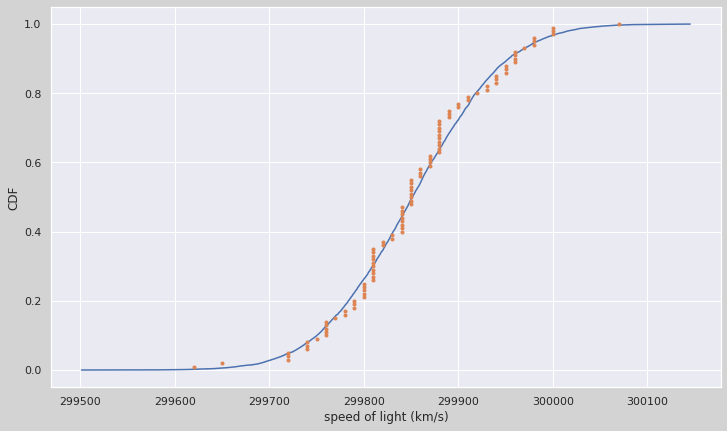

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n + 1) / n

    return x, y

vel_air_arr = np.array(vel_air)
mean = np.mean(vel_air_arr)
std = np.std(vel_air_arr)
samples = np.random.normal(mean, std, size=10000)

x, y = ecdf(vel_air_arr)
x_theor, y_theor = ecdf(samples)

# Set default Seaborn style
sns.set()

# figure size
plt.figure(figsize=(12, 7), facecolor='lightgrey')

# Checking Normality of Michelson data
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('speed of light (km/s)')
_ = plt.ylabel('CDF')
plt.show()

### __The Normal PDF__

In this exercise, we will explore the Normal PDF and also learn a way to plot a PDF of a known distribution using hacker statistics. Specifically, a Normal PDF for various values of the variance.



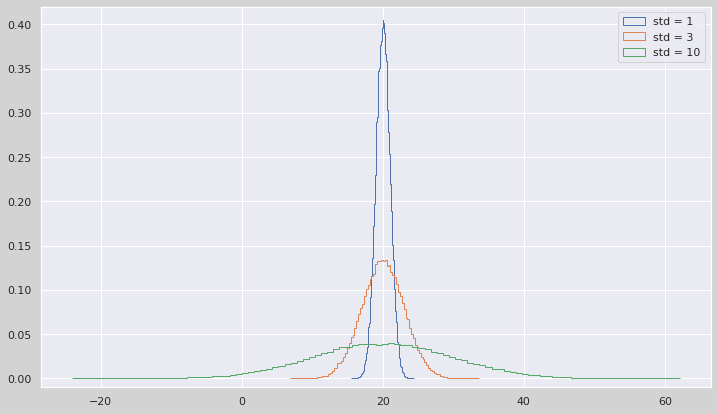

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Seed random number generator
np.random.seed(42)

# Draw 100000 samples from Normal distribution with stds of interest: samples_std1, samples_std3,
#   samples_std10
samples_std1 = np.random.normal(20, 1, size=100000)
samples_std3 = np.random.normal(20, 3, size=100000)
samples_std10 = np.random.normal(20, 10, size=100000)

# figure size
plt.figure(figsize=(12, 7), facecolor='lightgrey')

# Set default Seaborn style
sns.set()

# Make histograms
_ = plt.hist(samples_std1, bins=100, density=True, histtype='step')
_ = plt.hist(samples_std3, bins=100, density=True, histtype='step')
_ = plt.hist(samples_std10, bins=100, density=True, histtype='step')

# Make a legend, set limits and show plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'))
plt.ylim(-0.01, 0.42)
plt.show()


Different standard deviations result in PDFs of different widths. The peaks are all centered at the mean of 20.

### __The Normal CDF__

Now that you have a feel for how the Normal PDF looks, let's consider its CDF. Using the samples you generated in the last exercise (in your namespace as `samples_std1`, `samples_std3`, and `samples_std10`), generate and plot the CDFs.

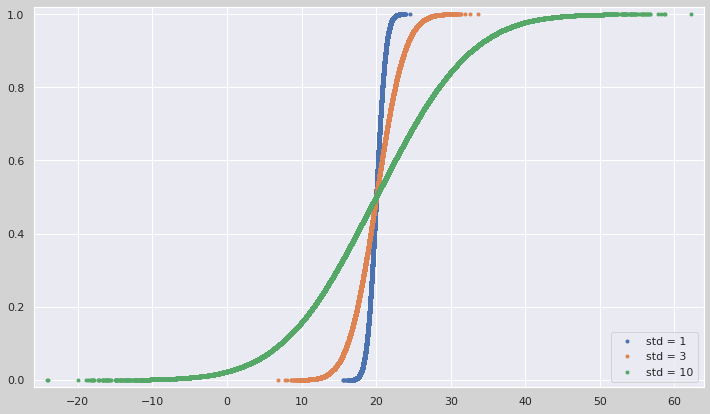

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

# Seed random number generator
np.random.seed(42)

# Draw 100000 samples from Normal distribution with stds of interest: samples_std1, samples_std3,
#   samples_std10
samples_std1 = np.random.normal(20, 1, size=100000)
samples_std3 = np.random.normal(20, 3, size=100000)
samples_std10 = np.random.normal(20, 10, size=100000)

# Generate CDFs
x_std1, y_std1 = ecdf(samples_std1)
x_std3, y_std3 = ecdf(samples_std3)
x_std10, y_std10 = ecdf(samples_std10)

# figure size
plt.figure(figsize=(12, 7), facecolor='lightgrey')

# Set default Seaborn style
sns.set()

# Plot CDFs
_ = plt.plot(x_std1, y_std1, marker='.', linestyle='none')
_ = plt.plot(x_std3, y_std3, marker='.', linestyle='none')
_ = plt.plot(x_std10, y_std10, marker='.', linestyle='none')

# Make 2% margin
plt.margins(0.02)

# Make a legend and show the plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'), loc='lower right')
plt.show()

There is no need to label the axes because we have not defined what is being described by the Normal distribution; we are just looking at shapes of CDFs.

- The CDFs all pass through the **mean** at the **50th percentile**; the **mean** and **median** of a **Normal distribution** are **equal**. 

- The width of the CDF varies with the standard deviation.



### __Belmont Stakes Dataset__

### __Are the Belmont Stakes results Normally distributed?__

Since 1926, the **Belmont Stakes** is a `1.5` mile-long race of 3-year old thoroughbred horses.

Secretariat ran the fastest Belmont Stakes in history in 1973. While that was the fastest year, 1970 was the slowest because of unusually wet and sloppy conditions.

With these **two outliers removed** from the data set, compute the **mean** and **standard deviation** of the Belmont winners' times. Sample out of a Normal distribution with this mean and standard deviation using the `np.random.normal()` function and plot a CDF. Overlay the ECDF from the winning Belmont times. Are these close to Normally distributed?

Note: Data is scraped from Belmont Stakes from the [Belmont Wikipedia page](https://en.wikipedia.org/wiki/Belmont_Stakes).

__Instructions__

- Compute mean and standard deviation of Belmont winners' times with the two outliers removed. The NumPy array `belmont_no_outliers` has these data.

- Take 10,000 samples out of a normal distribution with this mean and standard deviation using `np.random.normal()`.

- Compute the CDF of the theoretical samples and the ECDF of the Belmont winners' data, assigning the results to `x_theor`, `y_theor` and `x` ,`y`, respectively.

- Hit submit to plot the CDF of your samples with the ECDF, label your axes and show the plot.

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

belmont= pd.read_csv('belmont.csv')
belmont.set_index('Year',inplace=True)
belmont.head()


,Winner,Jockey,Trainer,Owner,Time,Track,miles
Year,,,,,,,
2016,Creator,"Irad Ortiz, Jr",Steve Asmussen,WinStar Farm LLC,2:28.51,Belmont,1.5
2015,American Pharoah,Victor Espinoza,Bob Baffert,"Zayat Stables, LLC",2:26.65,Belmont,1.5
2014,Tonalist,Joel Rosario,Christophe Clement,Robert S. Evans,2:28.52,Belmont,1.5
2013,Palace Malice,Mike Smith,Todd Pletcher,Dogwood Stable,2:30.70,Belmont,1.5
2012,Union Rags,John Velazquez,Michael Matz,Phyllis M. Wyeth,2:30.42,Belmont,1.5


In [36]:
belmont.dtypes

Winner      object
Jockey      object
Trainer     object
Owner       object
Time        object
Track       object
miles      float64
dtype: object

In [37]:
belmont.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91 entries, 2016 to 1926
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Winner   91 non-null     object 
 1   Jockey   91 non-null     object 
 2   Trainer  91 non-null     object 
 3   Owner    91 non-null     object 
 4   Time     91 non-null     object 
 5   Track    91 non-null     object 
 6   miles    91 non-null     float64
dtypes: float64(1), object(6)
memory usage: 5.7+ KB


In [38]:
import numpy as np
from datetime import datetime

time = pd.DatetimeIndex(belmont['Time'])
# convertiing %h%m%s to minute 
belmont_time_m = time.hour * 60 + time.minute + time.second/60
belmont_no_outliers = np.array(belmont_time_m)
print(type(belmont_no_outliers))
print(belmont_no_outliers)

<class 'numpy.ndarray'>
[148.5        146.65       148.51666667 150.7        150.41666667
 150.86666667 151.56666667 147.53333333 149.65       148.73333333
 147.85       148.75       147.5        148.25       149.7
 146.55       151.18333333 147.86666667 149.15       148.81666667
 148.95       152.01666667 146.81666667 149.96666667 146.11666667
 148.1        147.2        146.         146.4        148.2
 149.8        147.         147.2        147.8        148.2
 149.         149.8        148.6        146.8        149.6
 149.         148.2        149.2        144.         148.
 150.4        154.         148.8        147.2        148.8
 149.6        148.4        148.4        150.2        148.8
 149.2        149.2        148.4        150.2        146.6
 149.8        149.         150.8        148.6        150.2
 149.         148.6        150.2        148.2        149.4
 150.8        150.2        152.2        148.2        149.2
 151.         149.6        149.6        149.4        148.6
 150.

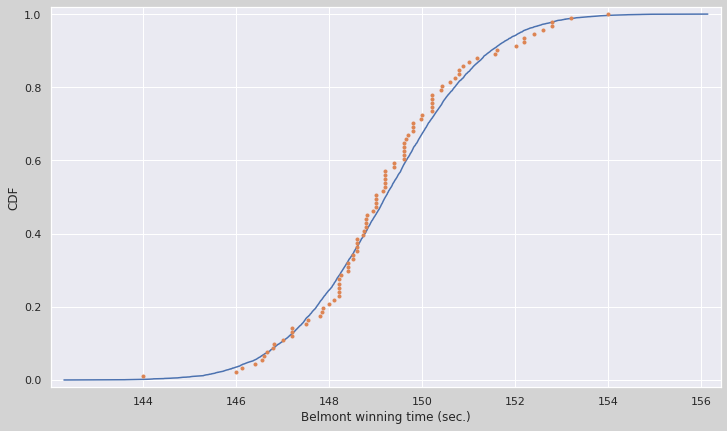

In [39]:
# defining ECDF
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n + 1) / n

    return x, y


# Seed random number generator
np.random.seed(42)

# Compute mean and standard deviation: mu, sigma
mu = np.mean(belmont_no_outliers)
sigma = np.std(belmont_no_outliers)

# Sample out of a normal distribution with this mu and sigma: samples
samples = np.random.normal(mu, sigma, 10000)

# Get the CDF of the samples and of the data
x_theor, y_theor = ecdf(samples)
x, y = ecdf(belmont_no_outliers)

# figure size
plt.figure(figsize=(12, 7), facecolor='lightgrey')

# Set default Seaborn style
sns.set()

# Plot the CDFs and show the plot
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('Belmont winning time (sec.)')
_ = plt.ylabel('CDF')
plt.show()

The **theoretical CDF** and the **ECDF** of the data suggest that the winning Belmont times are, indeed, **Normally distributed**. This also suggests that in the last 100 years or so, there have not been major technological or training advances that have significantly affected the speed at which horses can run this race.

### __What are the chances of a horse matching or beating Secretariat's record?__

Assume that the Belmont winners' times are Normally distributed (with the 1970 and 1973 years removed), what is the probability that the winner of a given Belmont Stakes will run it as fast or faster than Secretariat?

__Instructions__

- Take 1,000,000 samples from the normal distribution using the `np.random.normal()` function. The mean mu and standard deviation sigma are already loaded into the namespace of your IPython instance.

- Compute the fraction of samples that have a time less than or equal to Secretariat's time of 144 seconds.

- Print the result.

In [40]:
belmont.drop([1970, 1971, 1972, 1973], inplace= True)

In [41]:
belmont.shape

(87, 7)

In [42]:
import numpy as np
from datetime import datetime

time = pd.DatetimeIndex(belmont['Time'])
# convertiing %h%m%s to minute 
belmont_time_m = time.hour * 60 + time.minute + time.second/60
belmont_no_outliers = np.array(belmont_time_m)

In [43]:
# Compute mean and standard deviation: mu, sigma
mu = np.mean(belmont_no_outliers)
sigma = np.std(belmont_no_outliers)

# Seed random number generator
np.random.seed(42)

# Take a million samples out of the Normal distribution: samples
samples = np.random.normal(mu, sigma, 1000000)

# Compute the fraction that are faster than 144 seconds: prob
prob = len(samples[np.where(samples <= 144)]) / len(samples)

# Print the result
print('Probability of besting Secretariat:', prob)

Probability of besting Secretariat: 0.000636


We had to take a million samples because the probability of a fast time is very low and we had to be sure to sample enough. We get that there is only a `0.06%` chance of a horse running the Belmont as fast as Secretariat.

## __The Exponential distribution__

**Trip -- bus stop:** We know that the number of buses that will arrive per hour are **Poisson distributed**. But the **amount of time** between arrivals of buses is **Exponentially distributed**.

>***the waiting time between arrivals of a Poisson process are exponentially distributed.*** It has a single parameter, the mean waiting time. This distribution is not peaked.

__Possible Poisson process__

As an example, we can look at the time between all incidents involving **nuclear power** since 1974. We might expect incidents to be **well-modeled by a Poisson process**, ie, the **timing of one incident** is **independent** of all others.

__Exponential inter-incident times__

```python
mean = np.mean(inter_times)
samples = np.random.exponential(mean, size=10000)
x, y = ecdf(inter_times)
x_theor, y_theor = ecdf(samples)
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('time (days)')
_ = plt.ylabel('CDF')
plt.show()
```



__Matching a story and a distribution__

How might we expect the time between Major League no-hitters to be distributed? Be careful here: a few exercises ago, we considered the probability distribution for the number of no-hitters in a season. Now, we are looking at the probability distribution of the time between no hitters.

$\color{red}{\textbf{Answer:}}$ Exponential

---

__Waiting for the next Secretariat__

Unfortunately, Justin was not alive when Secretariat ran the Belmont in 1973. Do you think he will get to see a performance like that? To answer this, you are interested in how many years you would expect to wait until you see another performance like Secretariat's. How is the waiting time until the next performance as good or better than Secretariat's distributed? 

$\color{red}{\textbf{Answer}}$ Exponential: A horse as fast as Secretariat is a rare event, which can be modeled as a Poisson process, and the waiting time between arrivals of a Poisson process is Exponentially distributed.

__The Exponential distribution describes the waiting times between rare events, and Secretariat is rare!__



### __If you have a story, you can simulate it!__

Sometimes, the story describing our probability distribution does not have a named distribution to go along with it. In these cases, fear not! You can always simulate it. We'll do that in this and the next exercise.

In earlier exercises, we looked at the rare event of no-hitters in Major League Baseball. *Hitting the cycle* is another rare baseball event. When a batter hits the cycle, he gets all four kinds of hits, a single, double, triple, and home run, in a single game. Like no-hitters, this can be modeled as a Poisson process, so the time between hits of the cycle are also Exponentially distributed.

How long must we wait to see both a no-hitter and then a batter hit the cycle? The idea is that we have to wait some time for the no-hitter, and then after the no-hitter, we have to wait for hitting the cycle. Stated another way, what is the total waiting time for the arrival of two different Poisson processes? The total waiting time is the time waited for the no-hitter, plus the time waited for the hitting the cycle.

Now, you will write a function to sample out of the distribution described by this story.

__Instructions__

- Define a function with call signature `successive_poisson(tau1, tau2, size=1)` that samples the waiting time for a no-hitter and a hit of the cycle.

    - Draw waiting times `tau1` (`size` number of samples) for the no-hitter out of an exponential distribution and assign to `t1`.

    - Draw waiting times `tau2` (`size` number of samples) for hitting the cycle out of an exponential distribution and assign to `t2`.

    - The function returns the sum of the waiting times for the two events.


In [44]:
import numpy as np

def successive_poisson(tau1, tau2, size=1):
    """Compute time for arrival of 2 successive Poisson processes."""
    # Draw samples out of first exponential distribution: t1
    t1 = np.random.exponential(tau1, size)

    # Draw samples out of second exponential distribution: t2
    t2 = np.random.exponential(tau2, size)

    return t1 + t2


### __Distribution of no-hitters and cycles__

Now, you'll use your sampling function to compute the waiting time to observe a no-hitter and hitting of the cycle. The mean waiting time for a no-hitter is 764 games, and the mean waiting time for hitting the cycle is 715 games.

- Use your `successive_poisson()` function to draw 100,000 out of the distribution of waiting times for observing a no-hitter and a hitting of the cycle.

- Plot the PDF of the waiting times using the step histogram technique of a previous exercise. Don't forget the necessary keyword arguments. You should use `bins=100`, `normed=True`, and `histtype='step'`.

- Label the axes.
- Show your plot.

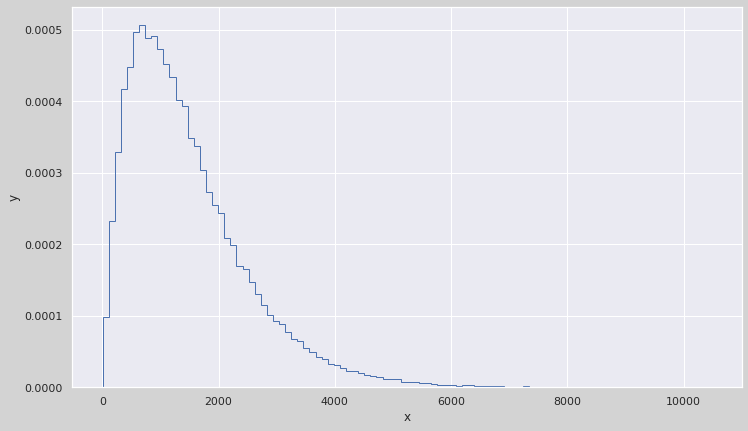

In [45]:
import numpy as np
import matplotlib.pyplot as plt

def successive_poisson(tau1, tau2, size=1):
    # Draw samples out of first exponential distribution: t1
    t1 = np.random.exponential(tau1, size)

    # Draw samples out of second exponential distribution: t2
    t2 = np.random.exponential(tau2, size)

    return t1 + t2

# Draw samples of waiting times: waiting_times
waiting_times = np.array(successive_poisson(764, 715, 100000))

# figure size
plt.figure(figsize=(12, 7), facecolor='lightgrey')

# Set default Seaborn style
sns.set()

# Make the histogram
_ = plt.hist(waiting_times, bins=100, density=True, histtype='step')

# Label axes
_ = plt.xlabel('x')
_ = plt.ylabel('y')

# Show the plot
plt.show()

Notice that the **PDF** is peaked, unlike the waiting time for a single Poisson process. For fun (and enlightenment), I encourage you to also plot the CDF




<p align='center'> 
    <a href="https://twitter.com/F4izy"> 
        <img src="https://th.bing.com/th/id/OIP.FCKMemzqNplY37Jwi0Yk3AHaGl?w=233&h=207&c=7&o=5&pid=1.7" width=50px 
            height=50px> 
    </a> 
    <a href="https://www.linkedin.com/in/mohd-faizy/"> 
        <img src='https://th.bing.com/th/id/OIP.idrBN-LfvMIZl370Vb65SgHaHa?pid=Api&rs=1' width=50px height=50px> 
    </a> 
</p>